# **Importing Basic Necessary Libraries**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Data and checking info**

In [2]:
data = pd.read_csv('/content/CO2 Emissions_Canada.csv')
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# **Using Histogram to derive information from data**

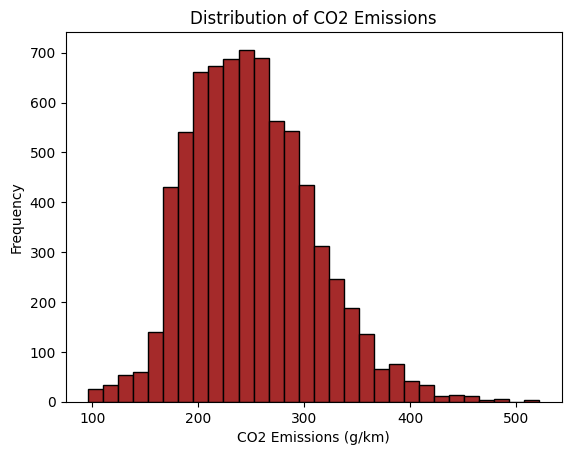

In [4]:
plt.hist(data['CO2 Emissions(g/km)'], bins=30, color='brown', edgecolor='black')
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

# **Interpretation**
• Data is symmetrical and fairly unimodal.

• Peak Value falls in a range somewhere between 240 and 270 g/km.

• Data spans from just under 100 g/km to around 500 g/km.  

# **Splitting dataset into features and target**

In [5]:
x = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

# **Getting numerical and categorical features for preprocessing**

In [6]:
num_features = x.select_dtypes(include=[int, float]).columns
cat_features = x.select_dtypes(include=[object]).columns

# **Using Correlation heatmap to visualize the linear relationship between numerical features in the dataset**

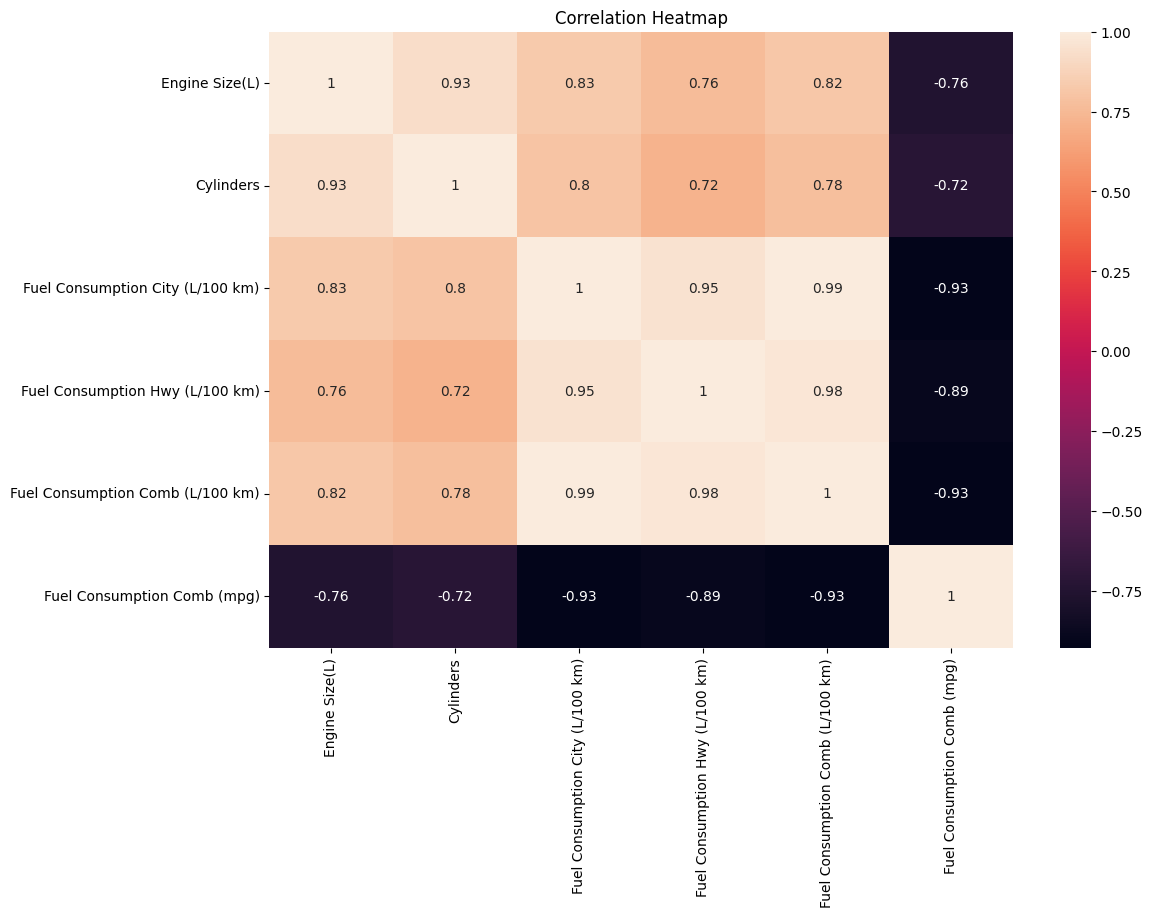

In [7]:
plt.figure(figsize=(12, 8))
corr = data[num_features].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

**Interpretation**: Correlation between numerical features ranges from ± 0.72 to ± 0.99 indicating, multicollinearity among several features.
**Conclusion**: Ridge regression would be a perfect training model for this dataset.

# **Creating intsances for scaling and encoding features**

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
Encoded = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Num', scaler, num_features),
        ('Cat', Encoded, cat_features)]
)

In [10]:
from sklearn.linear_model import Ridge
Model = Ridge()

# **Using pipeline to preprocess all features accordingly at once**

In [11]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('model', Model)]
)

# **Splitting data ito training and testing dataset**

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# **Training My Linear Model**

In [13]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num', StandardScaler(),
                                                  Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')),
                                                 ('Cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object'))])),
                ('model', Ridge())])

# **Evaluating model performance with testing dataset and linear model metrics**

In [14]:
y_pred = pipe.predict(x_test)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, mean_squared_error
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")

R2 score: 0.9942799757321271
Mean Absolute Error: 2.769999118747586
Mean Squared Error: 19.47585270603169
Root Mean Squared Error: 4.413145443561961


# **Conclusions drawn from metrics evaluation**
• R² = 0.99: My model is able to explain 99.2% of the variability in CO₂ emissions based on my input feature.

• MAE ≈ 2.77 g/km: On average, my predicted CO₂ emissions are off by about 2.77 grams per kilometer from the true values. Considering typical CO₂ emission values for vehicles often range from ~100 to 400 g/km, Ican say my average error is a very small one.

• RMSE ≈ 4.41 g/km: The root mean squared error being around 4.4 g/km means that typical prediction errors are low, but some predictions may deviate more due to outliers or harder-to-predict cases.

In [16]:
print()

# **Evaluating Bar plot to check how fuel type affects C02 emission rate**

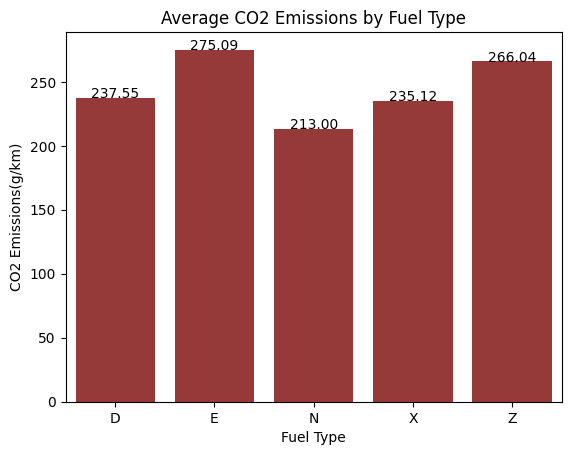

In [17]:
avg_emission = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().reset_index()

sns.barplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=avg_emission, color='brown')
plt.title('Average CO2 Emissions by Fuel Type')

for index, row in avg_emission.iterrows():
    plt.text(index, row['CO2 Emissions(g/km)'],
             f"{row['CO2 Emissions(g/km)']:.2f}", ha='center')

plt.show()


# **Conclusion**:
• Fuel Type E is the most polluting type on average.

• Fuel Type N is the cleanest fuel type on average.

# **Creating reusable function for user to predict CO2 Emissions(g/km)**

In [18]:
def predicted(Pipe):
  Cols = x.columns
  numericals = num_features
  values = {}
  for col in Cols:
    value = input(f"Enter value for '{col}': ")
    if col in numericals:
      try:
        value = float(value)
      except ValueError:
        print(f"Invalid input for {value}")
    values[col] = value
  var_name = col.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_').replace('-', '_')
  values[var_name] = value
  datas = pd.DataFrame([values])
  y_pred = pipe.predict(datas)
  y_pred = math.floor(y_pred[0])
  print(f"The predicted value of CO2 Emissions(g/km) is: {y_pred}")

In [19]:
import joblib

file_name = 'C02model.sav'

with open(file_name, 'wb') as file:
    joblib.dump(pipe, file)


In [20]:
# predicted(pipe)

In [21]:
x_train.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')

# **This Marks the end of my project**